## Import all required library

In [1]:
# Place to import all required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

## Malaria death csv

### Read csv file

In [2]:
# Github URL
deaths_url     = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/7ae08d9c797d2b87f2602d43411f74dbd00a5fe3/data/2018/2018-11-13/malaria_deaths.csv'

# Read the csv files
deaths_df = pd.read_csv(deaths_url)
print(deaths_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6156 non-null   object 
 1   Code                                                                              5292 non-null   object 
 2   Year                                                                              6156 non-null   int64  
 3   Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB
None


In [3]:
# Rename column

deaths_df = deaths_df.rename(columns={'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)':'Death (per 100,000 people)'})

print(deaths_df.head())

        Entity Code  Year  Death (per 100,000 people)
0  Afghanistan  AFG  1990                    6.802930
1  Afghanistan  AFG  1991                    6.973494
2  Afghanistan  AFG  1992                    6.989882
3  Afghanistan  AFG  1993                    7.088983
4  Afghanistan  AFG  1994                    7.392472


### Data preparation + check dataframe

In [4]:
# Check Entity column

print(deaths_df['Entity'].nunique())
print(deaths_df['Entity'].unique())

228
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andean Latin America'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australasia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Caribbean' 'Central African Republic' 'Central Asia'
 'Central Europe' 'Central Latin America' 'Central Sub-Saharan Africa'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Asia' 'Eastern Europe'
 'Eastern Sub-Saharan Africa' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghan

**From above Entity list can see there are many non-country name, including SDI category, or group of country by continent/region, such as Australasia (which include Australia, New Zealand, and etc.). Need to deal with it to avoid double count.**

In [5]:
!pip install pycountry
import pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.7 MB/s eta 0:00:00


In [6]:
# Get list of country from pycountry package

pycountry_countries = [country.name for country in pycountry.countries]

print(len(pycountry_countries))
print(pycountry_countries)

249
['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Åland Islands', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antarctica', 'French Southern Territories', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Bonaire, Sint Eustatius and Saba', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Saint Barthélemy', 'Belarus', 'Belize', 'Bermuda', 'Bolivia, Plurinational State of', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Bouvet Island', 'Botswana', 'Central African Republic', 'Canada', 'Cocos (Keeling) Islands', 'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Congo, The Democratic Republic of the', 'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Christmas Island', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 

**There are country names in this pycountry package that are coded in non-English characters (such as 'Åland Islands' and "Côte d'Ivoire"). Need to convert them into English characters.**

In [7]:
!pip install unidecode
from unidecode import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


In [8]:
# Unidecode the non-English characters

english_pycountry_countries = [unidecode(country) for country in pycountry_countries]

print(len(english_pycountry_countries))
print(english_pycountry_countries)

249
['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Aland Islands', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antarctica', 'French Southern Territories', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Bonaire, Sint Eustatius and Saba', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Saint Barthelemy', 'Belarus', 'Belize', 'Bermuda', 'Bolivia, Plurinational State of', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Bouvet Island', 'Botswana', 'Central African Republic', 'Canada', 'Cocos (Keeling) Islands', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, The Democratic Republic of the', 'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Christmas Island', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 

In [9]:
deaths_df_notclean = deaths_df[~deaths_df['Entity'].isin(english_pycountry_countries)]

print(deaths_df_notclean['Entity'].nunique())
print(deaths_df_notclean['Entity'].unique())

56
['Andean Latin America' 'Australasia' 'Bolivia' 'Brunei' 'Cape Verde'
 'Caribbean' 'Central Asia' 'Central Europe' 'Central Latin America'
 'Central Sub-Saharan Africa' 'Czech Republic'
 'Democratic Republic of Congo' 'East Asia' 'Eastern Europe'
 'Eastern Sub-Saharan Africa' 'England' 'High SDI'
 'High-income Asia Pacific' 'High-middle SDI' 'Iran' 'Laos'
 'Latin America and Caribbean' 'Low SDI' 'Low-middle SDI' 'Macedonia'
 'Micronesia (country)' 'Middle SDI' 'Moldova'
 'North Africa and Middle East' 'North America' 'North Korea'
 'Northern Ireland' 'Oceania' 'Palestine' 'Russia' 'Scotland' 'South Asia'
 'South Korea' 'Southeast Asia' 'Southern Latin America'
 'Southern Sub-Saharan Africa' 'Sub-Saharan Africa' 'Swaziland' 'Syria'
 'Taiwan' 'Tanzania' 'Timor' 'Tropical Latin America' 'Turkey'
 'United States Virgin Islands' 'Venezuela' 'Vietnam' 'Wales'
 'Western Europe' 'Western Sub-Saharan Africa' 'World']


**Seems like pycountry is missing out some countries like Bolivia, Brunei, Laos, and etc.**

In [10]:
!pip install country_list
import country_list

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00


In [11]:
# Get list of country from second package - country_list

from country_list import countries_for_language

country_names = dict(countries_for_language('en'))
cl_countries = list(country_names.values())
print(len(cl_countries))
print(cl_countries)

249
['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo - Brazzaville', 'Congo - Kinshasa', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 

In [12]:
# Convert all country name into English characters

english_cl_countries = [unidecode(country) for country in cl_countries]

print(len(english_cl_countries))
print(english_cl_countries)

249
['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo - Brazzaville', 'Congo - Kinshasa', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 

In [13]:
deaths_df_notclean = deaths_df[~deaths_df['Entity'].isin(english_cl_countries)]

print(deaths_df_notclean['Entity'].nunique())
print(deaths_df_notclean['Entity'].unique())

49
['Andean Latin America' 'Antigua and Barbuda' 'Australasia'
 'Bosnia and Herzegovina' 'Caribbean' 'Central Asia' 'Central Europe'
 'Central Latin America' 'Central Sub-Saharan Africa' 'Congo'
 'Czech Republic' 'Democratic Republic of Congo' 'East Asia'
 'Eastern Europe' 'Eastern Sub-Saharan Africa' 'England' 'High SDI'
 'High-income Asia Pacific' 'High-middle SDI'
 'Latin America and Caribbean' 'Low SDI' 'Low-middle SDI' 'Macedonia'
 'Micronesia (country)' 'Middle SDI' 'Myanmar'
 'North Africa and Middle East' 'North America' 'Northern Ireland'
 'Oceania' 'Palestine' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'Sao Tome and Principe' 'Scotland' 'South Asia' 'Southeast Asia'
 'Southern Latin America' 'Southern Sub-Saharan Africa'
 'Sub-Saharan Africa' 'Swaziland' 'Timor' 'Trinidad and Tobago'
 'Tropical Latin America' 'United States Virgin Islands' 'Wales'
 'Western Europe' 'Western Sub-Saharan Africa' 'World']


**Can see country_list is missing out some countries also! Like Antigua and Barbuda, England, Myanmar.**

In [14]:
# Combine both country list from pycountry and country_list to get complete country list as much as possible.

all_countries = english_pycountry_countries + english_cl_countries
all_countries = list(set(all_countries))

print(len(all_countries))
print(all_countries)

295
['Palestinian Territories', 'Guadeloupe', 'Micronesia, Federated States of', 'St. Pierre & Miquelon', 'U.S. Outlying Islands', 'Cook Islands', 'Haiti', 'South Korea', 'Turkiye', 'Botswana', 'Myanmar (Burma)', 'Sweden', 'Burundi', 'Falkland Islands (Malvinas)', 'Sao Tome & Principe', 'Chad', 'Saint Pierre and Miquelon', 'Virgin Islands, U.S.', 'French Polynesia', 'Saudi Arabia', 'Albania', 'Western Sahara', 'Lithuania', 'Saint Martin (French part)', 'India', 'Kenya', 'New Caledonia', 'Sao Tome and Principe', 'Malta', 'Ireland', 'Gabon', 'China', 'Somalia', 'Slovenia', 'Taiwan, Province of China', 'Uganda', 'St. Lucia', 'Cayman Islands', 'Mongolia', 'Gambia', 'Kiribati', 'Colombia', 'Romania', 'Hong Kong SAR China', 'British Indian Ocean Territory', 'Tanzania, United Republic of', 'Grenada', 'Bahamas', 'Russian Federation', 'Pitcairn', 'Uruguay', 'Kazakhstan', 'Tanzania', 'Jamaica', 'Ethiopia', 'United States', 'Norfolk Island', 'Mali', 'Slovakia', 'Puerto Rico', 'French Southern Ter

In [15]:
deaths_df_notclean = deaths_df[~deaths_df['Entity'].isin(all_countries)]

print(deaths_df_notclean['Entity'].nunique())
print(deaths_df_notclean['Entity'].unique())

41
['Andean Latin America' 'Australasia' 'Caribbean' 'Central Asia'
 'Central Europe' 'Central Latin America' 'Central Sub-Saharan Africa'
 'Czech Republic' 'Democratic Republic of Congo' 'East Asia'
 'Eastern Europe' 'Eastern Sub-Saharan Africa' 'England' 'High SDI'
 'High-income Asia Pacific' 'High-middle SDI'
 'Latin America and Caribbean' 'Low SDI' 'Low-middle SDI' 'Macedonia'
 'Micronesia (country)' 'Middle SDI' 'North Africa and Middle East'
 'North America' 'Northern Ireland' 'Oceania' 'Palestine' 'Scotland'
 'South Asia' 'Southeast Asia' 'Southern Latin America'
 'Southern Sub-Saharan Africa' 'Sub-Saharan Africa' 'Swaziland' 'Timor'
 'Tropical Latin America' 'United States Virgin Islands' 'Wales'
 'Western Europe' 'Western Sub-Saharan Africa' 'World']


**Now we have reduce the number the country not match to the country list. Decided to go manual to add the country name into the country list.**

In [16]:
# Create a finalise country list

manual_country_list = ['Czech Republic','Democratic Republic of Congo','England','Macedonia','Palestine','Scotland','Swaziland','Timor','Wales']
countries_finalised = all_countries + manual_country_list
countries_finalised = list(set(countries_finalised))

print(len(countries_finalised))
print(countries_finalised)

304
['Palestinian Territories', 'Guadeloupe', 'U.S. Outlying Islands', 'Micronesia, Federated States of', 'St. Pierre & Miquelon', 'Cook Islands', 'Haiti', 'South Korea', 'Turkiye', 'Botswana', 'Sweden', 'Burundi', 'Falkland Islands (Malvinas)', 'Sao Tome & Principe', 'England', 'Virgin Islands, U.S.', 'Saint Pierre and Miquelon', 'French Polynesia', 'Chad', 'Saudi Arabia', 'Albania', 'Western Sahara', 'Lithuania', 'Saint Martin (French part)', 'India', 'Myanmar (Burma)', 'Kenya', 'New Caledonia', 'Sao Tome and Principe', 'Malta', 'Ireland', 'Gabon', 'China', 'Somalia', 'Slovenia', 'Taiwan, Province of China', 'Uganda', 'St. Lucia', 'Cayman Islands', 'Mongolia', 'Gambia', 'Kiribati', 'Colombia', 'Romania', 'Hong Kong SAR China', 'British Indian Ocean Territory', 'Tanzania, United Republic of', 'Grenada', 'Bahamas', 'Russian Federation', 'Pitcairn', 'Uruguay', 'Kazakhstan', 'Tanzania', 'Jamaica', 'Ethiopia', 'United States', 'Democratic Republic of Congo', 'Norfolk Island', 'Mali', 'Slo

In [17]:
# Drop rows with Entity not in the country_finalised list

deaths_df_cleaned = deaths_df[deaths_df['Entity'].isin(countries_finalised)]

print(deaths_df_cleaned['Entity'].nunique())
print(deaths_df_cleaned.info())

196
<class 'pandas.core.frame.DataFrame'>
Index: 5292 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      5292 non-null   object 
 1   Code                        5211 non-null   object 
 2   Year                        5292 non-null   int64  
 3   Death (per 100,000 people)  5292 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 206.7+ KB
None


**Now the number of unique country in the dataset has reduced from 228 to 196.**

In [18]:
# Check the Code column with missing Code
# Check if there is any Entity with inconsistent Code

print(deaths_df_cleaned['Entity'].nunique())

code_na = deaths_df_cleaned[deaths_df_cleaned['Code'].isna()]
code_available = deaths_df_cleaned[deaths_df_cleaned['Code'].notna()]

code_na_entity = set(code_na['Entity'].to_list())
code_available_entity = set(code_available['Entity'].to_list())
print(len(code_na_entity) + len(code_available_entity))

196
196


In [19]:
# Check Year column

min_year = deaths_df_cleaned['Year'].min()
print(min_year)

max_year = deaths_df_cleaned['Year'].max()
print(max_year)

print(deaths_df_cleaned['Year'].value_counts())

1990
2016
Year
1990    196
2004    196
2015    196
2014    196
2013    196
2012    196
2011    196
2010    196
2009    196
2008    196
2007    196
2006    196
2005    196
2003    196
1991    196
2002    196
2001    196
2000    196
1999    196
1998    196
1997    196
1996    196
1995    196
1994    196
1993    196
1992    196
2016    196
Name: count, dtype: int64


In [20]:
min_death = deaths_df_cleaned['Death (per 100,000 people)'].min()
print('Lowest death rate: ', min_death)

max_death = deaths_df_cleaned['Death (per 100,000 people)'].max()
print('Highest death rate: ', max_death)

Lowest death rate:  0.0
Highest death rate:  229.228881455


### Do EDA

In [21]:
# Summary statistics

avg_death = deaths_df_cleaned['Death (per 100,000 people)'].mean()
print('Average death rate: ', avg_death)

med_death = deaths_df_cleaned['Death (per 100,000 people)'].median()
print('Median death rate: ', med_death)

iqr_death = iqr(deaths_df_cleaned['Death (per 100,000 people)'])
print('Interquartile death range: ', iqr_death)

Average death rate:  16.49835833517186
Median death rate:  0.01445410981185
Interquartile death range:  3.4930519118250003


**i. The mean is calculated by summing all the values in a data set and dividing by the total number of values.**

**ii. The median is the middle value of a data set when it is ordered from smallest to largest.**

**iii. The interquartile range is the middle 50% of observed death. So, 50% of all observed deaths is within 3.49 (per 100,000 people).**


In [22]:
# Check the country with 0 death rate - are these countries that have been declared malaria-free?

reported_0_death = deaths_df_cleaned[deaths_df_cleaned['Death (per 100,000 people)'] == 0.0]
print(reported_0_death.info())
print(reported_0_death['Entity'].nunique())
print(reported_0_death['Entity'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2351 entries, 27 to 5993
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      2351 non-null   object 
 1   Code                        2270 non-null   object 
 2   Year                        2351 non-null   int64  
 3   Death (per 100,000 people)  2351 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 91.8+ KB
None
95
['Albania' 'Andorra' 'Antigua and Barbuda' 'Armenia' 'Australia' 'Austria'
 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Brunei' 'Bulgaria' 'Canada' 'Chile' 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominica' 'England' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Greenland'
 'Grenada' 'Hungary' 'Iceland' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'La

**As of Feb 2024, there are 43 countries certified malaria-free from the WHO, including Austria, Canada, Japan, and etc.**

In [23]:
# Check number of country in current dataset
country_count = deaths_df_cleaned['Entity'].nunique()
print(country_count)

# Check year range in current dataset
year_count = deaths_df_cleaned['Year'].nunique()
print(year_count)

196
27


Average death rate over 27 years:  16.498358335171865


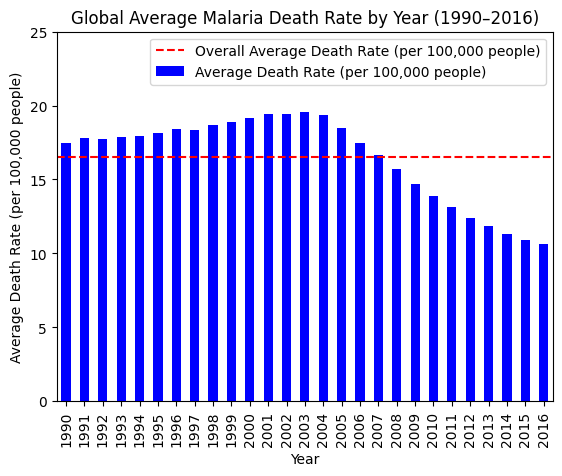

In [24]:
# Groupby Year to show which Year has the highest average malaria death rate
grouped_year = deaths_df_cleaned.groupby('Year')['Death (per 100,000 people)'].sum().reset_index()
grouped_year['Average Death Rate (per 100,000 people)'] = grouped_year['Death (per 100,000 people)'] / country_count


# Calculate a reference value
reference_value = sum(grouped_year['Average Death Rate (per 100,000 people)']) / year_count
print('Average death rate over 27 years: ', reference_value)


# Plot the histogram of grouped data
grouped_year.plot('Year', 'Average Death Rate (per 100,000 people)', kind='bar', color='blue')
plt.ylim(0, 25)
plt.axhline(y=reference_value, color='red', linestyle='--', label='Overall Average Death Rate (per 100,000 people)')
plt.legend()

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Death Rate (per 100,000 people)')
plt.title('Global Average Malaria Death Rate by Year (1990–2016)')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 154 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   20 non-null     object 
 1   Death (per 100,000 people)               20 non-null     float64
 2   Average Death Rate (per 100,000 people)  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 640.0+ bytes
None
Average death rate across all country:  16.49835833517186


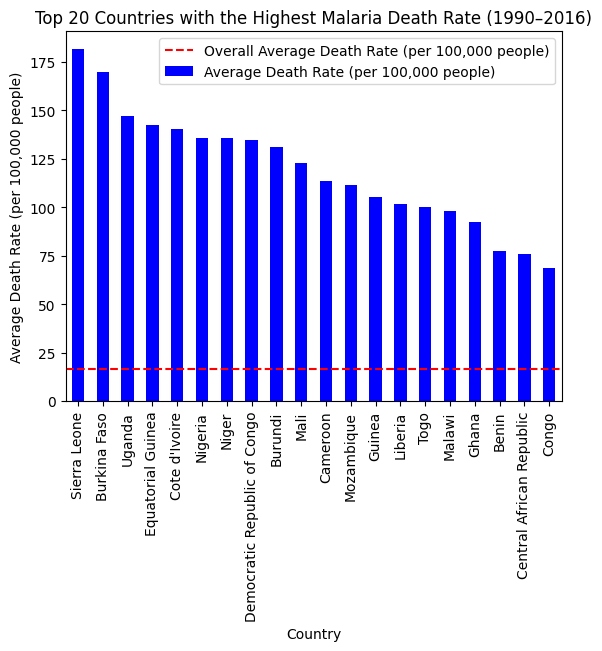

In [25]:
# Groupby Country to show which Country has the highest malaria death rate
grouped_country = deaths_df_cleaned.groupby('Entity')['Death (per 100,000 people)'].sum().reset_index()
grouped_country['Average Death Rate (per 100,000 people)'] = grouped_country['Death (per 100,000 people)'] / year_count
top_20_death_country = grouped_country.nlargest(20, 'Death (per 100,000 people)')
print(top_20_death_country.info())

# Calculate a reference value
reference_value = sum(grouped_country['Average Death Rate (per 100,000 people)']) / country_count
print('Average death rate across all country: ', reference_value)

# Plot the histogram of top_30_death_country
top_20_death_country.plot('Entity', 'Average Death Rate (per 100,000 people)', kind='bar', color='blue')
plt.axhline(y=reference_value, color='red', linestyle='--', label='Overall Average Death Rate (per 100,000 people)')
plt.legend()

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Death Rate (per 100,000 people)')
plt.title('Top 20 Countries with the Highest Malaria Death Rate (1990–2016)')
plt.show()

In [26]:
# Create data for grouped bar chart of top 3 country with highest malaria death rate

sierra_leone = deaths_df_cleaned[deaths_df_cleaned['Entity'] == 'Sierra Leone']
sierra_leone_rate = sierra_leone['Death (per 100,000 people)'].to_list()
print(len(sierra_leone_rate))

burkina_faso = deaths_df_cleaned[deaths_df_cleaned['Entity'] == 'Burkina Faso']
burkina_faso_rate = burkina_faso['Death (per 100,000 people)'].to_list()
print(len(burkina_faso_rate))

uganda = deaths_df_cleaned[deaths_df_cleaned['Entity'] == 'Uganda']
uganda_rate = uganda['Death (per 100,000 people)'].to_list()
print(len(uganda_rate))

# Years as x-axis
years = sierra_leone['Year'].to_list()

27
27
27


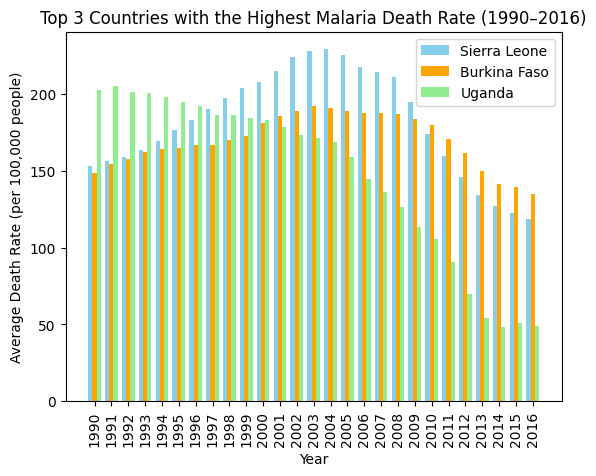

In [27]:
# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = np.arange(len(years))

# Create the grouped bar chart
plt.bar(x - bar_width, sierra_leone_rate, width=bar_width, label='Sierra Leone', color='skyblue')
plt.bar(x, burkina_faso_rate, width=bar_width, label='Burkina Faso', color='orange')
plt.bar(x + bar_width, uganda_rate, width=bar_width, label='Uganda', color='lightgreen')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Average Death Rate (per 100,000 people)')
plt.title('Top 3 Countries with the Highest Malaria Death Rate (1990–2016)')
plt.xticks(x, years, rotation=90)
plt.legend()

# Display the plot
plt.show()

## Malaria death age csv

### Read csv file

In [28]:
# Github URL
deaths_age_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/7ae08d9c797d2b87f2602d43411f74dbd00a5fe3/data/2018/2018-11-13/malaria_deaths_age.csv'

deaths_age_df = pd.read_csv(deaths_age_url)
print(deaths_age_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30780 entries, 0 to 30779
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30780 non-null  int64  
 1   entity      30780 non-null  object 
 2   code        26460 non-null  object 
 3   year        30780 non-null  int64  
 4   age_group   30780 non-null  object 
 5   deaths      30780 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB
None


In [29]:
deaths_age_df.head(5)

,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363


In [30]:
# Check if the unnamed column is actually an index column

print(deaths_age_df['Unnamed: 0'].min(), deaths_age_df['Unnamed: 0'].max())

1 30780


In [31]:
# Since the unnamed column is an index and not going to be helpful, I decided to drop it

deaths_age_df.drop(columns=['Unnamed: 0'], inplace=True)
print(deaths_age_df.head())

        entity code  year age_group      deaths
0  Afghanistan  AFG  1990   Under 5  184.606435
1  Afghanistan  AFG  1991   Under 5  191.658193
2  Afghanistan  AFG  1992   Under 5  197.140197
3  Afghanistan  AFG  1993   Under 5  207.357753
4  Afghanistan  AFG  1994   Under 5  226.209363


### Data preparation + check dataframe

In [32]:
# Check entity column

print(deaths_age_df['entity'].nunique())
print(deaths_age_df['entity'].unique())

228
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andean Latin America'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australasia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Caribbean' 'Central African Republic' 'Central Asia'
 'Central Europe' 'Central Latin America' 'Central Sub-Saharan Africa'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Asia' 'Eastern Europe'
 'Eastern Sub-Saharan Africa' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghan

**From above list can see this dataframe has same problem as the previous dataframe 'death_df'. There are many non-country name, including SDI category, or group of country by continent/region. We can use the 'country_finalised' list we previously created to clean this dataframe.**

In [33]:
deaths_age_df_cleaned = deaths_age_df[deaths_age_df['entity'].isin(countries_finalised)]

print(deaths_age_df_cleaned['entity'].nunique())
print(deaths_age_df_cleaned.info())

196
<class 'pandas.core.frame.DataFrame'>
Index: 26460 entries, 0 to 30779
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     26460 non-null  object 
 1   code       26055 non-null  object 
 2   year       26460 non-null  int64  
 3   age_group  26460 non-null  object 
 4   deaths     26460 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB
None


In [34]:
# Check the Code column with missing Code
# Check if there is any Entity with inconsistent Code

print(deaths_age_df_cleaned['entity'].nunique())

code_na = deaths_age_df_cleaned[deaths_age_df_cleaned['code'].isna()]
code_available = deaths_age_df_cleaned[deaths_age_df_cleaned['code'].notna()]

code_na_entity = set(code_na['entity'].to_list())
code_available_entity = set(code_available['entity'].to_list())
print(len(code_na_entity) + len(code_available_entity))

196
196


In [35]:
# Check Year column

min_year = deaths_age_df_cleaned['year'].min()
print(min_year)

max_year = deaths_age_df_cleaned['year'].max()
print(max_year)

print(deaths_age_df_cleaned['year'].value_counts())

1990
2016
year
1990    980
2004    980
2015    980
2014    980
2013    980
2012    980
2011    980
2010    980
2009    980
2008    980
2007    980
2006    980
2005    980
2003    980
1991    980
2002    980
2001    980
2000    980
1999    980
1998    980
1997    980
1996    980
1995    980
1994    980
1993    980
1992    980
2016    980
Name: count, dtype: int64


In [36]:
# Check age_group column

print(deaths_age_df_cleaned['age_group'].value_counts())

age_group
Under 5        5292
70 or older    5292
5-14           5292
15-49          5292
50-69          5292
Name: count, dtype: int64


In [37]:
# Check deaths column

min_death = deaths_age_df_cleaned['deaths'].min()
print('Lowest death count: ', min_death)

max_death = deaths_age_df_cleaned['deaths'].max()
print('Highest death count: ', max_death)

Lowest death count:  0.0
Highest death count:  261794.558211


**Questions: is the 'death' column represent death rate over a certain population? or it is a death count?**

### Do EDA

In [38]:
# Summary statistics

avg_death = deaths_age_df_cleaned['deaths'].mean()
print('Average death count: ', avg_death)

med_death = deaths_age_df_cleaned['deaths'].median()
print('Median death count: ', med_death)

sum_death = deaths_age_df_cleaned['deaths'].sum()
print('Total death count: ', sum_death)

iqr_death = iqr(deaths_age_df_cleaned['deaths'])
print('Interquartile death range: ', iqr_death)

Average death count:  880.2876319896803
Median death count:  0.04624100958295
Total death count:  23292410.74244694
Interquartile death range:  33.211130223475


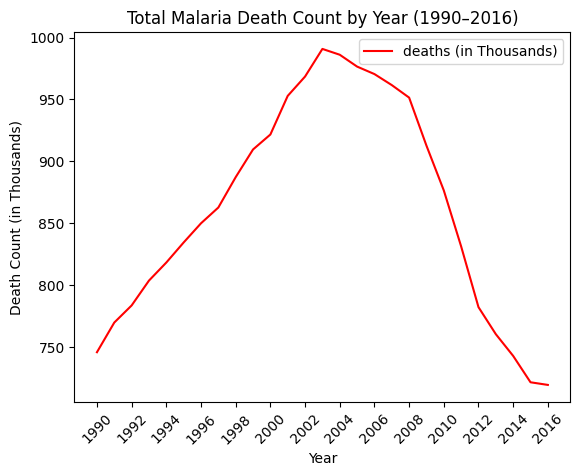

In [39]:
# Groupby Year to show which Year has the highest average malaria death count
grouped_year = deaths_age_df_cleaned.groupby('year')['deaths'].sum().reset_index()
grouped_year['deaths (in Thousands)'] = grouped_year['deaths'] / 1000

# Plot the histogram of grouped data
grouped_year.plot('year', 'deaths (in Thousands)', kind='line', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Death Count (in Thousands)')
plt.xticks(grouped_year['year'][::2], rotation=45)
plt.title('Total Malaria Death Count by Year (1990–2016)')
plt.show()

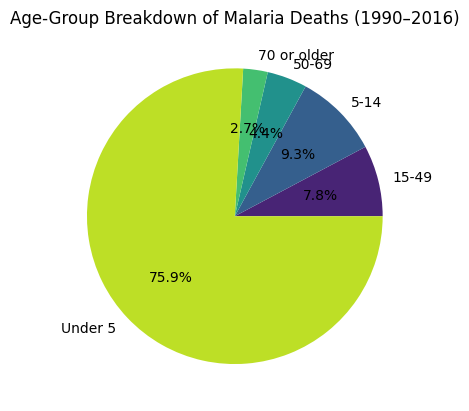

In [40]:
# Groupby age_group to show which age_group has the highest malaria death count

grouped_age_group = deaths_age_df_cleaned.groupby('age_group')['deaths'].sum().reset_index()
grouped_age_group['deaths (in Thousands)'] = grouped_age_group['deaths'] / 1000

# Data for the pie chart
labels = grouped_age_group['age_group']
sizes  = grouped_age_group['deaths (in Thousands)']

# Get a colormap and apply it
# Choose shades from the 'viridis' colormap
colors = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9])

# Create a pie chart with colormap-based colors
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Age-Group Breakdown of Malaria Deaths (1990–2016)')

# Show the chart
plt.show()

In [41]:
# Groupby entity and age_group, to study is 'Under 5' the most vulnarable across all country?

# Groupby entity and age_group, sum deaths count over the years
grouped_entity_age_group = deaths_age_df_cleaned.groupby(['entity', 'age_group'])['deaths'].sum().reset_index()

# Sort dataframe to get age_group with highest death counts in each entity
grouped_entity_age_group_sorted = grouped_entity_age_group.sort_values(by=['entity', 'deaths'], ascending=[True, False])

# Select first row in each group (the age_group with highest death count in each entity)
first_row_by_entity = grouped_entity_age_group_sorted.groupby('entity').first().reset_index()
print(first_row_by_entity.head(5))
print(first_row_by_entity.info())
print('-------------------------')
print('')

# Drop country that does not has any death cause by malaria
with_death = first_row_by_entity[first_row_by_entity['deaths'] != 0]
print(with_death.head(5))
print(with_death.info())

           entity age_group        deaths
0     Afghanistan     15-49  23613.437336
1         Albania     15-49      0.000000
2         Algeria     15-49    126.611257
3  American Samoa     15-49      1.888408
4         Andorra     15-49      0.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     196 non-null    object 
 1   age_group  196 non-null    object 
 2   deaths     196 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.7+ KB
None
-------------------------

           entity age_group         deaths
0     Afghanistan     15-49   23613.437336
2         Algeria     15-49     126.611257
3  American Samoa     15-49       1.888408
5          Angola   Under 5  148686.641855
7       Argentina     15-49      63.038211
<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 195
Data columns (total 3 columns):
 # 

**I dropped the entity with zero malaria death count, because in that entity there is no age_group to study which contribute most of the death count.**

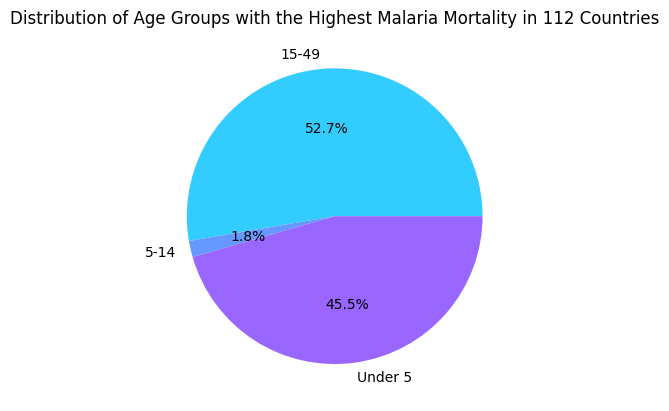

In [42]:
# Data for the second pie chart
groupby_age_group_with_death = with_death.groupby('age_group')['entity'].count().reset_index()
labels = groupby_age_group_with_death['age_group']
sizes  = groupby_age_group_with_death['entity']

# Get a colormap and apply it
# Choose shades from the 'viridis' colormap
colors = plt.cm.cool([0.2, 0.4, 0.6, 0.8, 1])

# Create a pie chart with colormap-based colors
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Age Groups with the Highest Malaria Mortality in 112 Countries')

# Show the chart
plt.show()

**Conclusion: "Under 5" age group accounts for the 75% of malaria deaths, but in less than half of the countries, this age group has the highest malaria mortality rate. This suggests that malaria mortality patterns may vary significantly by country. In other countries, different age groups may have higher mortality rates from malaria.**

## Malaria incidence csv

### Read csv file

In [43]:
# Github URL
incidence_url  = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/7ae08d9c797d2b87f2602d43411f74dbd00a5fe3/data/2018/2018-11-13/malaria_inc.csv'

incidence_df = pd.read_csv(incidence_url)
print(incidence_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Entity                                                                              508 non-null    object 
 1   Code                                                                                400 non-null    object 
 2   Year                                                                                508 non-null    int64  
 3   Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB
None


In [44]:
incidence_df.head(5)

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


In [45]:
# Rename column

incidence_df = incidence_df.rename(columns={'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)':'Incidence (per 1,000 population)'})

print(incidence_df.head())

        Entity Code  Year  Incidence (per 1,000 population)
0  Afghanistan  AFG  2000                        107.100000
1  Afghanistan  AFG  2005                         46.500000
2  Afghanistan  AFG  2010                         23.900000
3  Afghanistan  AFG  2015                         23.600000
4      Algeria  DZA  2000                          0.037746


### Data preparation + check dataframe

In [46]:
# Check entity column

print(incidence_df['Entity'].nunique())
print(incidence_df['Entity'].unique())

127
['Afghanistan' 'Algeria' 'Angola' 'Argentina' 'Azerbaijan' 'Bangladesh'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde' 'Central African Republic'
 'Chad' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Democratic Republic of Congo' 'Djibouti' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia'
 'Fragile and conflict affected situations' 'Gabon' 'Gambia' 'Georgia'
 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Heavily indebted poor countries (HIPC)' 'Honduras' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Kenya' 'Kyrgyzstan' 'Laos' 'Late-demographic dividend'
 'Latin America & Caribbean' 'Latin America & Caribbean (IDA & IBRD)'
 'Latin America & Caribbe

**From above list can see this dataframe has same problem as previous two dataframes. There are many non-country name, including SDI category, or group of country by continent/region. We can use the country list we previously created to clean this dataframe.**

In [47]:
# Check what and how many Entity is dropped from the dataframe

non_country  = incidence_df[~incidence_df['Entity'].isin(countries_finalised)]

print(non_country['Entity'].nunique())
print(non_country['Entity'].unique())

28
['Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'IBRD only' 'IDA & IBRD total'
 'IDA blend' 'IDA only' 'IDA total' 'Late-demographic dividend'
 'Latin America & Caribbean' 'Latin America & Caribbean (IDA & IBRD)'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle income'
 'Pre-demographic dividend' 'South Asia' 'South Asia (IDA & IBRD)'
 'Sub-Saharan Africa' 'Sub-Saharan Africa (IDA & IBRD)'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World']


In [48]:
incidence_df_cleaned = incidence_df[incidence_df['Entity'].isin(countries_finalised)]

print(incidence_df_cleaned['Entity'].nunique())
print(incidence_df_cleaned.info())

99
<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            396 non-null    object 
 1   Code                              396 non-null    object 
 2   Year                              396 non-null    int64  
 3   Incidence (per 1,000 population)  396 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.5+ KB
None


In [49]:
# Check Year column

min_year = incidence_df_cleaned['Year'].min()
print(min_year)

max_year = incidence_df_cleaned['Year'].max()
print(max_year)

print(incidence_df_cleaned['Year'].value_counts())

2000
2015
Year
2000    99
2005    99
2010    99
2015    99
Name: count, dtype: int64


In [50]:
# Check Incidence column

min_inc = incidence_df_cleaned['Incidence (per 1,000 population)'].min()
print('Lowest incidence count: ', min_inc)

max_inc = incidence_df_cleaned['Incidence (per 1,000 population)'].max()
print('Highest incidence count: ', max_inc)

Lowest incidence count:  0.0
Highest incidence count:  1741.0


**Question : Incidence rate is per 1000 population, how can the rate be 1741? It is an outlier/wrong data input.**

### Do EDA

In [51]:
incidence_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            396 non-null    object 
 1   Code                              396 non-null    object 
 2   Year                              396 non-null    int64  
 3   Incidence (per 1,000 population)  396 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.5+ KB


In [52]:
incidence_df_cleaned.head(10)

,Entity,Code,Year,"Incidence (per 1,000 population)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
5,Algeria,DZA,2005,0.002021
6,Algeria,DZA,2010,0.001273
7,Algeria,DZA,2015,0.001904
8,Angola,AGO,2000,315.600000
9,Angola,AGO,2005,299.500000


In [53]:
# Define the bins and labels
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000',
          '1001-1100', '1101-1200', '1201-1300', '1301-1400', '1401-1500', '1501-1600', '1601-1700', '1701-1800']

# Bin the 'Incidence' column
incidence_df_cleaned['Incidence Group'] = pd.cut(incidence_df_cleaned['Incidence (per 1,000 population)'], bins=bins, labels=labels, right=False)
print(incidence_df_cleaned['Incidence Group'].value_counts())

Incidence Group
0-100        232
101-200       53
401-500       39
201-300       32
301-400       27
501-600        9
601-700        3
1701-1800      1
801-900        0
701-800        0
1001-1100      0
1101-1200      0
1201-1300      0
1301-1400      0
1401-1500      0
1501-1600      0
1601-1700      0
901-1000       0
Name: count, dtype: int64


<ipython-input-53-bb9f68fd0c20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_df_cleaned['Incidence Group'] = pd.cut(incidence_df_cleaned['Incidence (per 1,000 population)'], bins=bins, labels=labels, right=False)


**Can see there is an outlier at incidence group '1701-1800'**

In [54]:
# Summary statistics

avg_inc = incidence_df_cleaned['Incidence (per 1,000 population)'].mean()
print('Average incidence count: ', avg_death)

med_inc = incidence_df_cleaned['Incidence (per 1,000 population)'].median()
print('Median incidence count: ', med_death)

iqr_inc = iqr(incidence_df_cleaned['Incidence (per 1,000 population)'])
print('Interquartile incidence range: ', iqr_death)

Average incidence count:  880.2876319896803
Median incidence count:  0.04624100958295
Interquartile incidence range:  33.211130223475


In [55]:
# Check number of country in current dataset
country_count = incidence_df_cleaned['Entity'].nunique()
print(country_count)

# Check year range in current dataset
year_count = incidence_df_cleaned['Year'].nunique()
print(year_count)

99
4


Average incidence rate ofor the recorded 4 years:  140.64534994030674


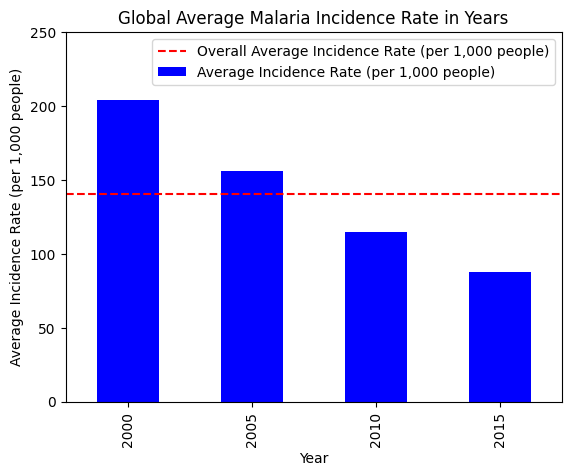

In [56]:
# Groupby Year to show which Year has the highest average malaria incidence rate
grouped_year = incidence_df_cleaned.groupby('Year')['Incidence (per 1,000 population)'].sum().reset_index()
grouped_year['Average Incidence Rate (per 1,000 people)'] = grouped_year['Incidence (per 1,000 population)'] / country_count


# Calculate a reference value
reference_value = sum(grouped_year['Average Incidence Rate (per 1,000 people)']) / year_count
print('Average incidence rate ofor the recorded 4 years: ', reference_value)


# Plot the histogram of grouped data
grouped_year.plot('Year', 'Average Incidence Rate (per 1,000 people)', kind='bar', color='blue')
plt.ylim(0, 250)
plt.axhline(y=reference_value, color='red', linestyle='--', label='Overall Average Incidence Rate (per 1,000 people)')
plt.legend()

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Incidence Rate (per 1,000 people)')
plt.title('Global Average Malaria Incidence Rate in Years')
plt.show()

## Merged Incidence and Death dataframe

In [57]:
# Merge incidence and death dataframes to study if there is a relationship between incidence rate and death rate in 2000, 2005, 2010, and 2015

inc_merged_death = pd.merge(incidence_df_cleaned[['Entity','Year','Incidence (per 1,000 population)']], deaths_df_cleaned[['Entity','Year','Death (per 100,000 people)']], on=['Entity', 'Year'], how='inner')
print(inc_merged_death.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            396 non-null    object 
 1   Year                              396 non-null    int64  
 2   Incidence (per 1,000 population)  396 non-null    float64
 3   Death (per 100,000 people)        396 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.5+ KB
None


In [58]:
# Standardize the incidence rate and death rate into per in this dataframe
inc_merged_death['Incidence (per 100,000 people)'] = inc_merged_death['Incidence (per 1,000 population)'] * 100

# Derive fatality rate
inc_merged_death['Fatality Rate'] = inc_merged_death['Death (per 100,000 people)'] / inc_merged_death['Incidence (per 100,000 people)']

# Drop rows with no fatality rate
inc_merged_death.dropna(subset=['Fatality Rate'], inplace=True)
print(inc_merged_death.info())

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 395
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            391 non-null    object 
 1   Year                              391 non-null    int64  
 2   Incidence (per 1,000 population)  391 non-null    float64
 3   Death (per 100,000 people)        391 non-null    float64
 4   Incidence (per 100,000 people)    391 non-null    float64
 5   Fatality Rate                     391 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 21.4+ KB
None


In [59]:
# Only select the top 3 country as example
top_3_country = ['Sierra Leone','Burkina Faso','Uganda']

top3_inc_merged_death = inc_merged_death[inc_merged_death['Entity'].isin(top_3_country)]
print(top3_inc_merged_death.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 48 to 367
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            12 non-null     object 
 1   Year                              12 non-null     int64  
 2   Incidence (per 1,000 population)  12 non-null     float64
 3   Death (per 100,000 people)        12 non-null     float64
 4   Incidence (per 100,000 people)    12 non-null     float64
 5   Fatality Rate                     12 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 672.0+ bytes
None


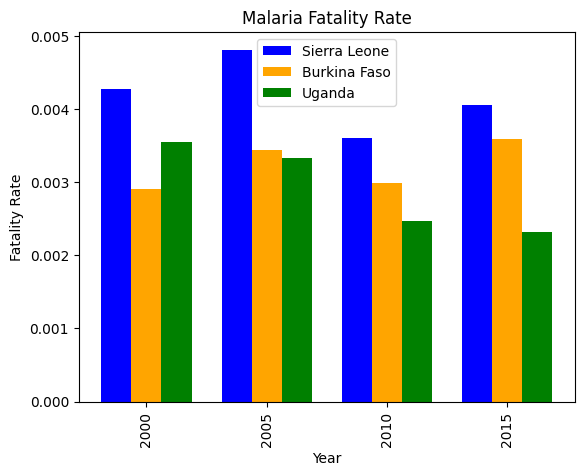

In [60]:
# Create data for grouped bar chart of top 3 country with highest malaria death rate
sierra_leone_rate = top3_inc_merged_death[top3_inc_merged_death['Entity'] == 'Sierra Leone']['Fatality Rate'].to_list()
burkina_faso_rate = top3_inc_merged_death[top3_inc_merged_death['Entity'] == 'Burkina Faso']['Fatality Rate'].to_list()
uganda_rate       = top3_inc_merged_death[top3_inc_merged_death['Entity'] == 'Uganda']['Fatality Rate'].to_list()

# Years as x-axis
years = [2000, 2005, 2010, 2015]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = np.arange(len(years))

# Create the grouped bar chart
plt.bar(x - bar_width, sierra_leone_rate, width=bar_width, label='Sierra Leone', color='blue')
plt.bar(x, burkina_faso_rate, width=bar_width, label='Burkina Faso', color='orange')
plt.bar(x + bar_width, uganda_rate, width=bar_width, label='Uganda', color='green')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Fatality Rate')
plt.title('Malaria Fatality Rate')
plt.xticks(x, years, rotation=90)
plt.legend()

# Display the plot
plt.show()